## Contents

- EDA by Year
- EDA by Country
- Tv Show -vs- Movie

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.font_manager as fm
import plotly.graph_objects as go
warnings.filterwarnings(action='ignore')

## load dataset
- [Netflix dataset](https://www.kaggle.com/shivamb/netflix-shows)
- [IMDB dataset](https://www.imdb.com/interfaces/)
    - ratings
    - basics

## Netflix 연도별 컨텐츠 분석

In [2]:
netflix_origin = pd.read_csv('../../../archive/netflix_titles.csv')
netflix_origin.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#결측치 확인
netflix_origin.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
netflix_origin = netflix_origin.loc[netflix_origin['date_added'].isnull() == False]

netflix_origin["date_added"] = pd.to_datetime(netflix_origin['date_added'])
netflix_origin['year_added'] = netflix_origin['date_added'].dt.year
netflix_origin['month_added'] = netflix_origin['date_added'].dt.month

#실수형을 정수로변환
netflix_origin["year_added"] = netflix_origin["year_added"].astype(np.int64)
netflix_origin["month_added"] = netflix_origin["month_added"].astype(np.int64)

In [5]:
#Load Imdb Dataset
imdb_ratings = pd.read_csv('../../../archive/data.tsv', sep='\t')
imdb_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1864
1,tt0000002,6.0,244
2,tt0000003,6.5,1632
3,tt0000004,5.8,158
4,tt0000005,6.2,2459


In [6]:
imdb_basics = pd.read_csv('../../../archive/basics_data.tsv', sep='\t')
imdb_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
print(len(set(imdb_basics.tconst))) # 8749012 모두 고유한 영화 index
print(len(set(imdb_ratings.tconst))) # 1221334 모두 고유한 영화 index

8749012
1221013


In [8]:
#컨텐츠 타입 
imdb_basics.titleType.unique() 

array(['short', 'movie', 'tvEpisode', 'tvSeries', 'tvShort', 'tvMovie',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

## Dataset Join

In [9]:
#컨텐츠 타입중 movie와 tvSeries만 사용
imdb_basics=imdb_basics[ (imdb_basics.titleType=='movie') | (imdb_basics.titleType=='tvSeries') ] 
imdb_basics=imdb_basics[imdb_basics.startYear.apply(lambda x: str(x).isnumeric())] #startYear join시 사용
imdb=pd.merge(imdb_ratings.set_index('tconst'), imdb_basics.set_index('tconst'), left_index=True, right_index=True, how='inner')

In [10]:
print(imdb.shape)
imdb.head()

(355986, 10)


,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,,,
tt0000502,4.5,14,movie,Bohemios,Bohemios,0,1905,\N,100,\N
tt0000574,6.0,755,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
tt0000591,4.6,17,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
tt0000615,4.5,23,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
tt0000630,3.8,24,movie,Hamlet,Amleto,0,1908,\N,\N,Drama


In [11]:
imdb.startYear = imdb.startYear.astype(np.int64)
netflix_origin['title']=netflix_origin['title'].str.lower()
imdb['primaryTitle']=imdb['primaryTitle'].str.lower()

netfilx_imdb=pd.merge(netflix_origin, imdb, left_on=['title', 'release_year'], right_on=['primaryTitle', 'startYear'], how='inner')
netfilx_imdb.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,7.4,6231,movie,dick johnson is dead,Dick Johnson Is Dead,0,2020,\N,89,"Biography,Documentary,Drama"
1,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,7.0,2340,tvSeries,ganglands,Braqueurs,0,2021,\N,44,"Action,Crime,Drama"
2,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,6.7,194,tvSeries,jailbirds new orleans,Jailbirds New Orleans,0,2021,\N,\N,"Documentary,Reality-TV"
3,s7,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,...,6.9,3256,movie,my little pony: a new generation,My Little Pony: A New Generation,0,2021,\N,90,"Adventure,Animation,Comedy"
4,s8,Movie,sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,...,7.0,662,movie,sankofa,Sankofa,0,1993,\N,125,Drama


In [12]:
df_netfilx = netfilx_imdb[['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year',  'description', 'year_added', 'month_added', 'averageRating', 'numVotes', 
       'primaryTitle', 'originalTitle', 'rating', 'isAdult', 'startYear', 'endYear',
        'duration', 'runtimeMinutes', 'genres']]

# Movie 
df_movie = df_netfilx[df_netfilx.type =='Movie'].reset_index(drop=True)
# TvShow 
df_tvshow = df_netfilx[df_netfilx.type =='TV Show'].reset_index(drop=True)

## EDA by year

In [13]:
list_added_year= list(set(df_tvshow.year_added))
list_added_year = sorted(list_added_year)
print(len(list_added_year), list_added_year)

7 [2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [14]:
df_netfilx

,type,title,director,cast,country,date_added,release_year,description,year_added,month_added,...,numVotes,primaryTitle,originalTitle,rating,isAdult,startYear,endYear,duration,runtimeMinutes,genres
0,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,"As her father nears the end of his life, filmm...",2021,9,...,6231,dick johnson is dead,Dick Johnson Is Dead,PG-13,0,2020,\N,90 min,89,"Biography,Documentary,Drama"
1,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,To protect his family from a powerful drug lor...,2021,9,...,2340,ganglands,Braqueurs,TV-MA,0,2021,\N,1 Season,44,"Action,Crime,Drama"
2,TV Show,jailbirds new orleans,NaN,NaN,NaN,2021-09-24,2021,"Feuds, flirtations and toilet talk go down amo...",2021,9,...,194,jailbirds new orleans,Jailbirds New Orleans,TV-MA,0,2021,\N,1 Season,\N,"Documentary,Reality-TV"
3,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,Equestria's divided. But a bright-eyed hero be...,2021,9,...,3256,my little pony: a new generation,My Little Pony: A New Generation,PG,0,2021,\N,91 min,90,"Adventure,Animation,Comedy"
4,Movie,sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,"On a photo shoot in Ghana, an American model s...",2021,9,...,662,sankofa,Sankofa,TV-MA,0,1993,\N,125 min,125,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5312,TV Show,zindagi gulzar hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,"Strong-willed, middle-class Kashaf and carefre...",2016,12,...,3462,zindagi gulzar hai,Zindagi Gulzar Hai,TV-PG,0,2012,2013,1 Season,42,Romance
5313,Movie,zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,"A political cartoonist, a crime reporter and a...",2019,11,...,515891,zodiac,Zodiac,R,0,2007,\N,158 min,157,"Crime,Drama,Mystery"
5314,Movie,zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,Looking to survive in a world taken over by zo...,2019,11,...,555361,zombieland,Zombieland,R,0,2009,\N,88 min,88,"Action,Comedy,Horror"
5315,Movie,zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,"Dragged from civilian life, a former superhero...",2020,1,...,20812,zoom,Zoom,PG,0,2006,\N,88 min,93,"Action,Adventure,Comedy"


Text(0.5, 1.0, 'Contents over the years')

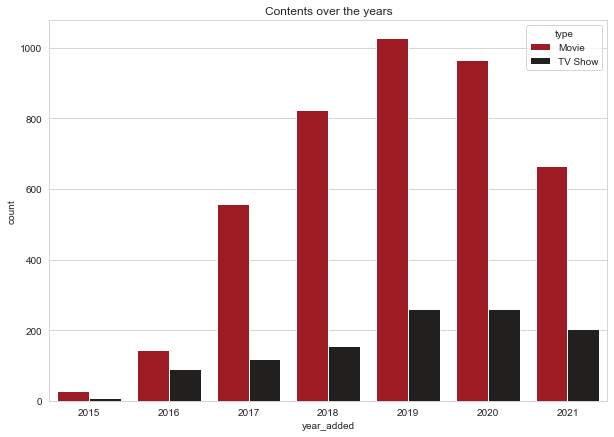

In [15]:
# 연도별 컨텐츠 개수
color_map = ['#b20710', '#221f1f']

plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(data=df_netfilx, palette=color_map, x='year_added' , hue='type', order=list_added_year)
plt.title('Contents over the years')

- 연도별 컨텐츠 등록 데이터 분석

    - 2015년부터 Movie, TvShow 대해 모두 넷플릭스에 등록되는 컨텐츠가 많아지고 있습니다.
    - TV Show의 등록수가 Movie에 비해 적은 수치이지만 이는 Tv show의 경우 시즌 1개가 하나의 카운트로 잡혔기 때문으로 넷플릭스가 Movie에 대해서만 많이 투자하는 것은 아닙니다.
- 두 분야에 대해 상세하게 알아보면 아래의 그래프처럼 연도별에 따라 비슷한 흐름으로 컨텐츠가 등록되고 있는것을 알 수 있습니다.

Text(0.5, 1.0, 'Contents over the years on a TV show')

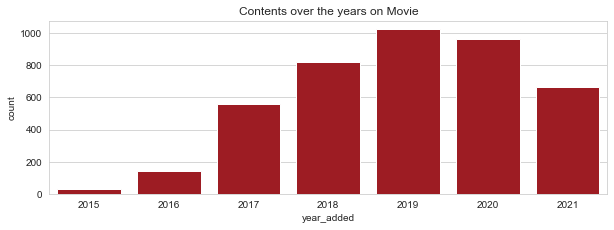

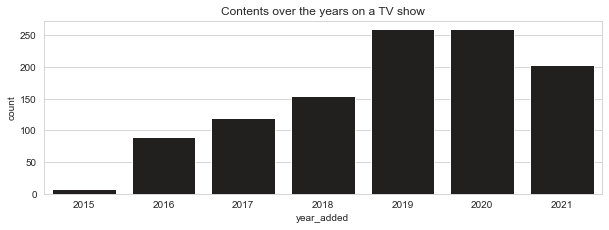

In [16]:
# 연도별 Movie 컨텐츠 개수
plt.figure(figsize=(10,7))
plt.subplot(211)
sns.countplot(data=df_movie, color=color_map[0], x='year_added', order=list_added_year)
plt.title('Contents over the years on Movie')

# 연도별 TvShow 컨텐츠 개수
plt.figure(figsize=(10,7))
plt.subplot(212)
sns.countplot(data=df_tvshow, color=color_map[1], x='year_added', order=list_added_year)
plt.title('Contents over the years on a TV show')

- 연도별 컨텐츠 등록 데이터 분석2
    - 2019년에 갑자기 등록되는 컨텐츠가 늘어납니다. 코로나의 영향으로 집에서 영화를 보는 사람이 늘어나서일까요?
    - 2018년과 2019년 월별 데이터를 분석해보겠습니다.

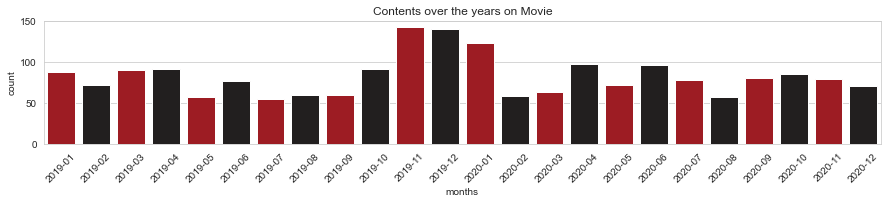

In [17]:
df_movie['month_added'] = df_movie['month_added'].apply(lambda x: "{:0>2d}".format(x))
df_movie['months'] = df_movie.year_added.map(str) + "-" + df_movie.month_added
df_monthmv = df_movie[(df_movie.year_added==2019 )|(df_movie.year_added==2020 )].sort_values('months')


# 월별 Movie 컨텐츠수
plt.figure(figsize=(15,5))
plt.subplot(211)
g = sns.countplot(data=df_monthmv, palette=color_map, x='months')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.title('Contents over the years on Movie')
plt.show()

### 2019~ 2020년 월별 컨텐츠 등록수
- 디즈니 플러스, 애플TV 서비스 런칭의 영향

    - 코로나19는 2019년 12월 중국 우한시에서 처음 확인되었고 이후 2020년 3월에 펜데믹 즉 세계적 범유행했는데 단지 코로나의 영향으로 컨텐츠가 2019년에 늘어난것은 아닌 것으로 보입니다. 이는 2019년 11월 1일 디즈니 플러스와 애플 티비 플러스 서비스가 미국에서 동시에 런칭되었기 때문입니다.경쟁자들과의 대결이 본격화되는 시기에 이루어진 투자로 보는것이 맞겠습니다.
- 코로나의 영향
    - 2020년과 2021년 계속적으로 많은 컨텐츠가 등록되고 있는것은 코로나의 여파로 인 것 같습니다.

------

### 연도별 작품 평가수
- 한 작품당 평가하는 수가 얼마나 늘고 있는지를 알아보겠습니다. 이를 통해 연도별로 컨텐츠 사용자가 컨텐츠에 대해 얼마나 소비하고 있는지 살펴볼수 있습니다.

In [18]:
df_counts = df_netfilx.groupby(['year_added']).sum()
df_counts['sizes'] = df_netfilx.groupby(['year_added']).size()
df_counts['meanVotes'] = (df_counts.numVotes / df_counts.sizes).astype(np.int64)

Text(0.5, 1.0, 'Mean of votes over the years')

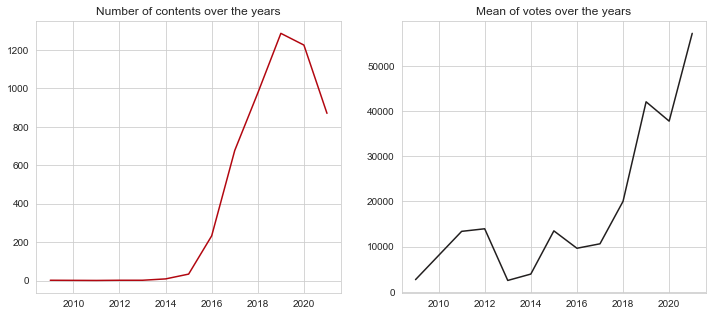

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(df_counts.index, df_counts.sizes, color=color_map[0])
plt.title('Number of contents over the years')

#sns.lineplot(data=df_counts, x='sizes') #contents size

plt.subplot(122)
plt.plot(df_counts.index, df_counts.meanVotes, color=color_map[1])
plt.title('Mean of votes over the years')

- 작품수가 증가함에따라 평가가 늘어나는 것은 당연하지만 한 컨텐츠당 평균적으로 평가하는 수 또한 늘고 있습니다. 이는 컨텐츠를 보는 사용자(구독자)수가 컨텐츠가 늘어남에 따라 늘어난 결과입니다. 또한 사용자는 작품에 대해 평가를 남겨 컨텐츠에 대해 좀더 능동적으로 소비하는 경향을 보이고 있습니다

###  인기 컨텐츠 및 평점이 높은 컨텐츠 분석

In [20]:
df_movie['averageRating'].describe()

count    4224.000000
mean        6.198627
std         1.159908
min         1.500000
25%         5.500000
50%         6.300000
75%         7.000000
max         9.100000
Name: averageRating, dtype: float64

<AxesSubplot:xlabel='averageRating', ylabel='Density'>

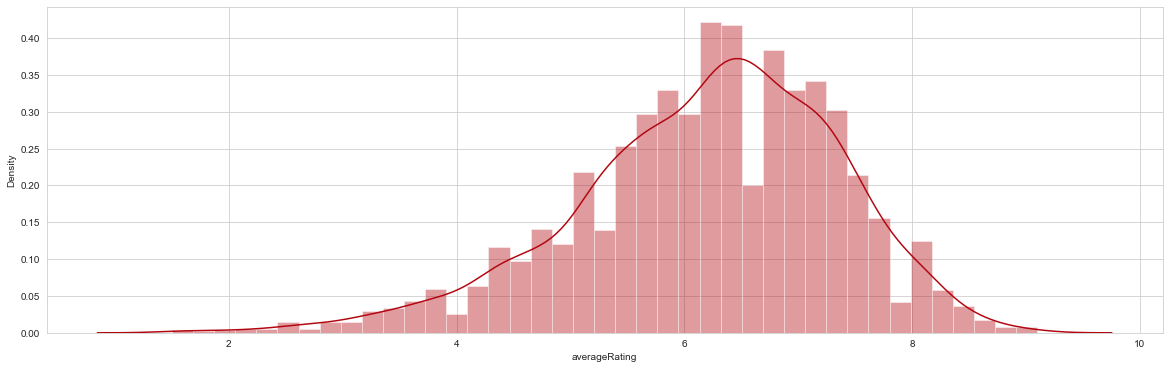

In [21]:
plt.figure(figsize=(20, 6))
sns.distplot(df_movie['averageRating'], fit_kws={'color':color_map[0]}, color=color_map[0])

- 넷플릭스 전체 컨텐츠에 대한 평점은 평균은 약 6.2점입니다.
- 사분위 범위(Interquartile range)의 평점으로 5.5~ 7.0 사이값이 주로 나타나고 있습니다.
연도별로 평점이 높거나 인기가 많은(votes수기준) 컨텐츠를 알아보겠습니다.

## 연도별 인기 상위 컨텐츠

- 인기 컨텐츠는 평점과 관계없이 사용자가 평가를 많이 남긴 것을 기준으로 했습니다. 평점이 저조해도 평점이 많이 남았다면 이슈가 되는 컨텐츠라고 생각할 수 있겠습니다.

In [22]:
def get_top_mv(year, n_top=5 ):
    topvote_mv = df_movie.sort_values(['year_added','numVotes'], ascending=[True, False]).groupby('year_added').head(n_top)
    topvote_mv =topvote_mv[['year_added','title','country', 'averageRating', 'numVotes', 'release_year']]
    
    return topvote_mv[topvote_mv.year_added==year]
    
def get_top_tv(year, n_top=5):    
    topvote_tv = df_tvshow.sort_values(['year_added','numVotes'], ascending=[True, False]).groupby('year_added').head(n_top)
    topvote_tv = topvote_tv[['year_added','title','country', 'averageRating', 'numVotes','release_year']]
    
    return topvote_tv[topvote_tv.year_added==year]

## 2021년 인기 Movie Top5

In [23]:
get_top_mv(2021, 5)

,year_added,title,country,averageRating,numVotes,release_year
157,2021,inception,"United States, United Kingdom",8.8,2241981,2010
189,2021,django unchained,United States,8.5,1475606,2012
3889,2021,the departed,"United States, Hong Kong",8.5,1273114,2006
593,2021,shutter island,United States,8.2,1240832,2010
3077,2021,goodfellas,United States,8.7,1103020,1990


## 2020년 인기 Movie Top5

In [24]:
get_top_mv(2020, 5)

,year_added,title,country,averageRating,numVotes,release_year
3978,2020,the lord of the rings: the return of the king,"New Zealand, United States",9.0,1759285,2003
3979,2020,the lord of the rings: the two towers,"New Zealand, United States",8.8,1589521,2002
2657,2020,american beauty,United States,8.4,1124298,1999
3275,2020,kill bill: vol. 1,"United States, Japan",8.2,1073390,2003
2589,2020,a clockwork orange,"United Kingdom, United States",8.3,803019,1971


- 실제 영화가 출시된지 오래된 영화들이 인기 영화로 나타나는 모습입니다. 이는 넷플릭스의 추천 시스템에 의해 사용자들이 최신작이 아니어도 취향에 따라 컨텐츠를 선택하는 것 때문으로 볼수 있겠습니다. 새로운 컨텐츠를 제공하는것 만큼이나 이미 재미나 가치가 검증된 컨텐츠를 사용자가 이용할 수 있도록 하는 것이 중요한데, 넥플릭스는 추천 시스템으로 이를 잘활용하고 있는것 같습니다.

- 또한 평가를 많이 받은 컨텐츠는 평점이 8점대 이상으로 좋게 나타나고 있습니다. 평가수와 평점간에 상관관계가 있다고 보입니다.

## 2021년 인기 Tv show Top5

In [25]:
get_top_tv(2021)

,year_added,title,country,averageRating,numVotes,release_year
6,2021,squid game,NaN,8.1,404864,2021
114,2021,attack on titan,Japan,9.1,328977,2013
108,2021,lupin,"France, United States",7.5,98481,2021
195,2021,demon slayer: kimetsu no yaiba,Japan,8.8,81769,2019
137,2021,shadow and bone,United States,7.7,75835,2021


## 2020년 인기 Tv show Top5

In [26]:
get_top_tv(2020)

,year_added,title,country,averageRating,numVotes,release_year
210,2020,bridgerton,United States,7.3,99159,2020
276,2020,emily in paris,United States,7.0,81493,2020
424,2020,locke & key,"Canada, United States",7.5,72385,2020
254,2020,paranormal,Egypt,8.6,71142,2020
367,2020,space force,United States,6.7,57817,2020


- TV show의 경우는 영화와 다르게 최근에 제작된 컨텐츠의 인기도가 높습니다. 작년 이슈가 되었던 컨텐츠인 오징어 게임이 2021년 1위로 랭크된것도 확인할수 있습니다.
- Tv show 부분에서는 넷플릭스 오리지널 컨텐츠 전략이, movie부분에서는 추천 시스템 전략이 많이 통하는 모습입니다.

## 연도별 평점 상위 컨텐츠

- 평점시스템에서 평가자가 적은 상태에서 나온 점수는 신빙성이 떨어질수 있습니다. 연도별로 평균 평가자수(meanVotes) 이상이 평가한 컨텐츠를 대상으로 평점을 산출하였습니다.

In [27]:
def get_meanVotes(n_year):
    return df_counts[df_counts.index == n_year].meanVotes.values[0]

df_movie_new = df_movie
df_tvshow_new = df_tvshow

df_movie_new['meanVotes'] = df_movie_new.apply(lambda x: get_meanVotes(x['year_added'])  , axis = 1 )
df_tvshow_new['meanVotes'] = df_tvshow_new.apply(lambda x: get_meanVotes(x['year_added'])  , axis = 1 )

df_movie_new = df_movie[df_movie.numVotes > df_movie.meanVotes]
df_tvshow_new = df_tvshow[df_tvshow.numVotes > df_tvshow.meanVotes]

def get_toprate_mv(year, n_top=5):    
    topvote_mv = df_movie_new.sort_values(['year_added','averageRating'], ascending=[True, False]).groupby('year_added').head(n_top)
    topvote_mv = topvote_mv[['year_added','title','country', 'averageRating', 'numVotes','release_year']]
    
    return topvote_mv[topvote_mv.year_added==year]

def get_toprate_tv(year, n_top=5):    
    toprate_tv = df_tvshow_new.sort_values(['year_added','averageRating'], ascending=[True, False]).groupby('year_added').head(n_top)
    toprate_tv = toprate_tv[['year_added','title','country', 'averageRating', 'numVotes','release_year']]
    
    return toprate_tv[toprate_tv.year_added==year]

## 2021년 평점 상위 Movie Top5

In [28]:
get_toprate_mv(2021, 5)

,year_added,title,country,averageRating,numVotes,release_year
157,2021,inception,"United States, United Kingdom",8.8,2241981,2010
3077,2021,goodfellas,United States,8.7,1103020,1990
497,2021,the pianist,"United Kingdom, France, Poland, Germany, Unite...",8.6,796078,2002
189,2021,django unchained,United States,8.5,1475606,2012
485,2021,3 idiots,India,8.5,379860,2009


## 2020년 평점 상위 Movie Top5

In [29]:
get_toprate_mv(2020, 5)

,year_added,title,country,averageRating,numVotes,release_year
3978,2020,the lord of the rings: the return of the king,"New Zealand, United States",9.0,1759285,2003
3979,2020,the lord of the rings: the two towers,"New Zealand, United States",8.8,1589521,2002
2856,2020,city of god,"Brazil, France, Germany",8.6,735905,2002
2657,2020,american beauty,United States,8.4,1124298,1999
2589,2020,a clockwork orange,"United Kingdom, United States",8.3,803019,1971


## 2021년 평점 상위 TV show Top5

In [30]:
get_toprate_tv(2021, 5)

,year_added,title,country,averageRating,numVotes,release_year
114,2021,attack on titan,Japan,9.1,328977,2013
195,2021,demon slayer: kimetsu no yaiba,Japan,8.8,81769,2019
6,2021,squid game,NaN,8.1,404864,2021
137,2021,shadow and bone,United States,7.7,75835,2021
108,2021,lupin,"France, United States",7.5,98481,2021


## 2020년 평점 상위 TV show Top5

In [31]:
get_toprate_tv(2020, 5)

,year_added,title,country,averageRating,numVotes,release_year
254,2020,paranormal,Egypt,8.6,71142,2020
221,2020,alice in borderland,Japan,7.6,45859,2020
453,2020,messiah,United States,7.6,41900,2020
417,2020,i am not okay with this,United States,7.5,54683,2020
424,2020,locke & key,"Canada, United States",7.5,72385,2020


- 평점 상위 컨텐츠에서도 인기컨텐츠와 비슷한 경향이 나타납니다. 영화의 경우 평점이 높은 예전영화들이 최근에도 계속 상위를 차지하고 있고, TV show의 넷플릭스 오리지널이 평점이 높게 나타나고있습니다.

## TV Show -vs- Movie

In [32]:
df = pd.read_csv('../../../archive/netflix_titles.csv')

# Replacments
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops
df.dropna(inplace=True)

# Drop Duplicates
df.drop_duplicates(inplace= True)

In [33]:
x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

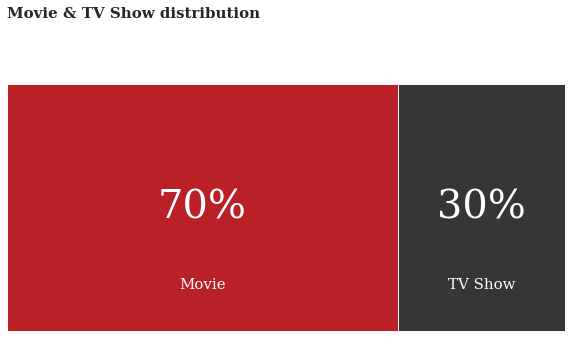

In [34]:
idx = mf_ratio.index
fig, ax = plt.subplots(1,1,figsize=(10, 5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

ax.annotate(f"{int(mf_ratio['Movie'][idx]*100)}%", 
               xy=(mf_ratio['Movie'][idx]/2, idx),
               va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
               color='white')

ax.annotate("Movie", 
               xy=(mf_ratio['Movie'][idx]/2, -0.25),
               va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
               color='white')

ax.annotate(f"{int(mf_ratio['TV Show'][idx]*100)}%", 
               xy=(mf_ratio['Movie'][idx]+mf_ratio['TV Show'][idx]/2, idx),
               va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
               color='white')
ax.annotate("TV Show", 
               xy=(mf_ratio['Movie'][idx]+mf_ratio['TV Show'][idx]/2, -0.25),
               va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
               color='white')

fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
plt.show()

In [35]:
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)

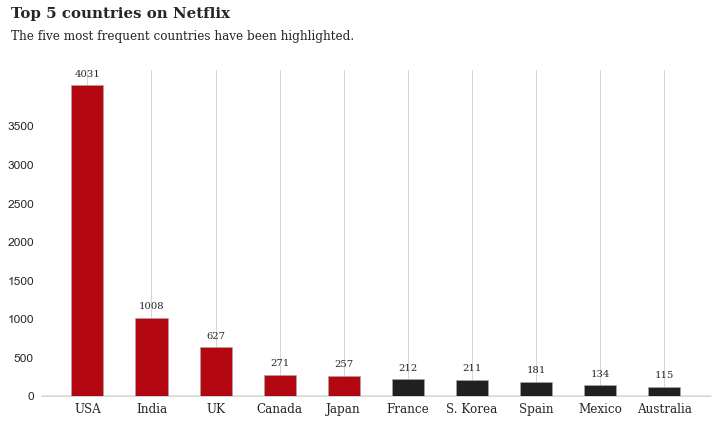

In [36]:
df['count'] = 1
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Plot

color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = color_map[3] = color_map[4] = '#b20710' # color highlight
color_map[5] = color_map[6] = color_map[7] = color_map[8] = color_map[9] ='#221f1f' # color highlight
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')



# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title
fig.text(0.09, 1, 'Top 5 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The five most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')


ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)


plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
ax.tick_params(axis='both', which='major', labelsize=12)
plt.show()

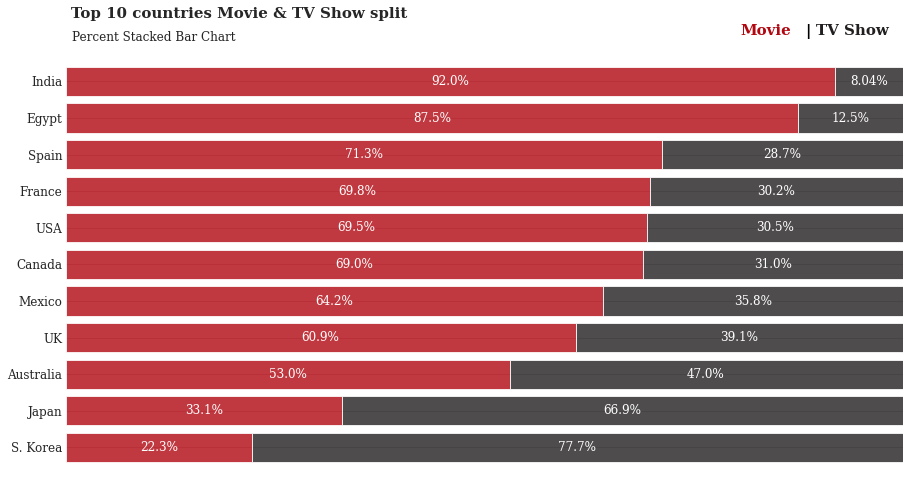

In [37]:
country_order = df['first_country'].value_counts()[:11].index
data_q2q3 = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]




###
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Insight

- 인도는 발리우드의 영향 때문 인지 Movie가 많고
- 우리나라는 예상대로 드라마 시리즈를 선호하는 경향이 있다.

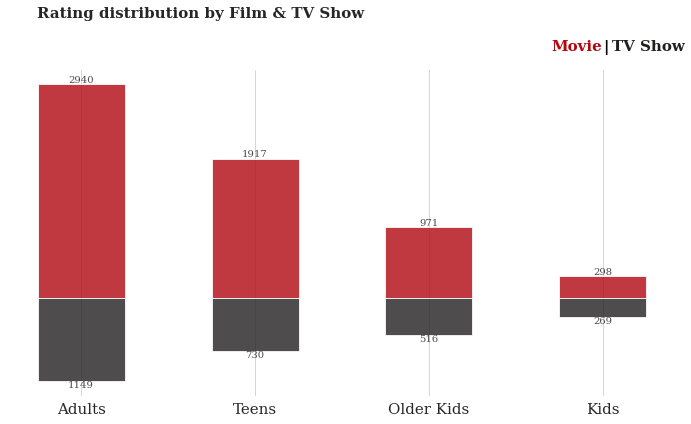

In [38]:
order = pd.DataFrame(df.groupby('target_ages')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['target_ages'])
mf = df.groupby('type')['target_ages'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']


fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')
    
 
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif', fontsize=15)
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')



fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.show()

## Insight

- 성인컨텐츠가 가장 많은 것을 확인할 수 있다.
- kids 컨텐츠의 경우 running time이 긴 컨텐츠(movie)가 적은 것을 확인할 수 있다.

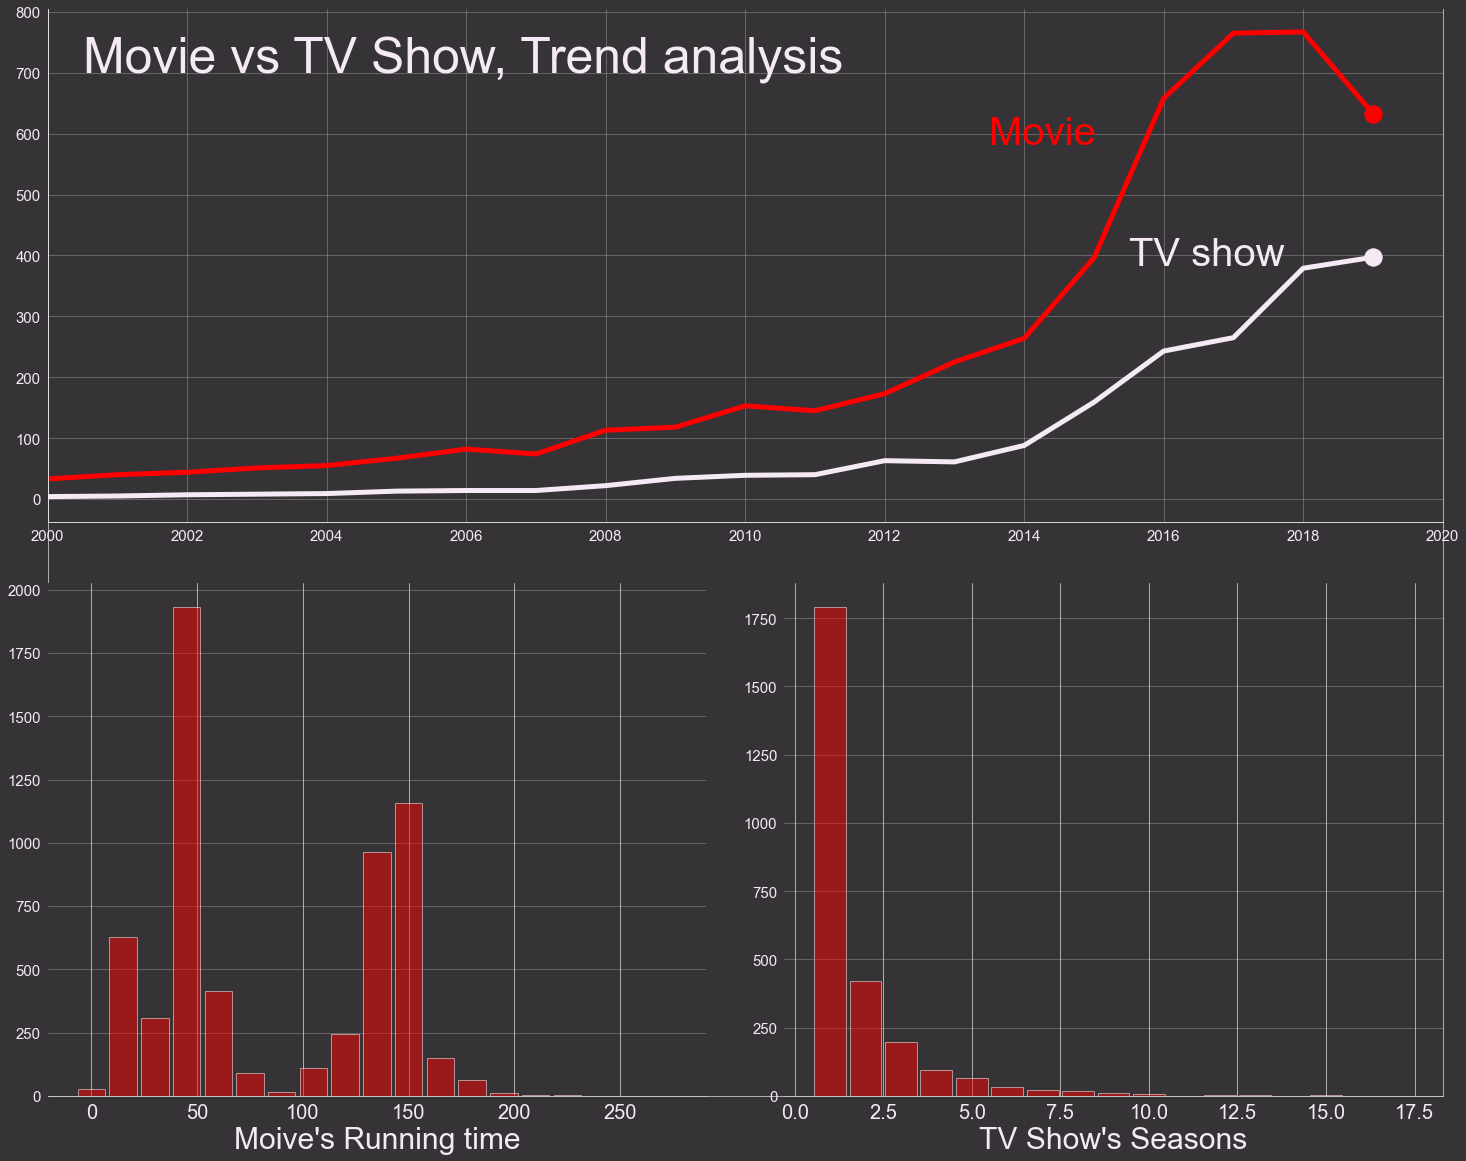

In [39]:
type_data = df[['type','release_year']]
TV_show = type_data[type_data['type'] =='TV Show'].groupby('release_year')['type'].count()
Movie = type_data[type_data['type'] =='Movie'].groupby('release_year')['type'].count()

fig, ax = plt.subplots(figsize=(25,20),facecolor="#363336")
ax.patch.set_facecolor('#363336')

spec = gridspec.GridSpec(ncols=21, nrows=21, figure=fig)
ax1 = fig.add_subplot(spec[:10, :],facecolor="#363336")
ax2 = fig.add_subplot(spec[11:, :10],facecolor="#363336")
ax3 = fig.add_subplot(spec[11:, 11:],facecolor="#363336")


ax1.scatter(x= list(dict(TV_show).keys())[-3],y=list(dict(TV_show).values())[-3],s=300, color='#F5E9F5')
ax1.scatter(x= list(dict(Movie).keys())[-3],y=list(dict(Movie).values())[-3],s=300, color='red')
sns.lineplot(x= list(dict(TV_show).keys())[:-2],y=list(dict(TV_show).values())[:-2],lw=5, color='#F5E9F5',ax=ax1)
sns.lineplot(x= list(dict(Movie).keys())[:-2],y=list(dict(Movie).values())[:-2],lw=5, color='red',ax=ax1)
ax1.text(s="Movie", x=2013.5, y= 600,color='red', va="center",ha="left",fontsize=40)
ax1.text(s="TV show", x=2015.5, y= 400,color='#F5E9F5', va="center",ha="left",fontsize=40)
ax1.set_xticks(list(range(2000,2022,2)))
ax1.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax1.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax1.spines['bottom'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xlim(2000,2020)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(True, alpha=0.4)
ax1.text(s="Movie vs TV Show, Trend analysis", x= 2000.5,y=700,color='#F5E9F5',fontsize=50)


moive_running_time = df[df['type'] =='Movie']['duration'].apply(lambda x : x.split(" ")[0])
moive_running_time = pd.to_numeric(moive_running_time)
movie_running_time = pd.DataFrame(moive_running_time)
def make_range(x):
    return x//15

moive_running_time = moive_running_time.apply(make_range)
moive_running_time = pd.DataFrame(moive_running_time.value_counts())
moive_running_time['index'] = moive_running_time.reset_index()['index']*15

ax2.bar(x = moive_running_time['index'], height = moive_running_time['duration'],width=13,color ='red',alpha=0.5)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_xlabel("Moive's Running time",  color='#F5E9F5', fontsize=30)
ax2.tick_params(axis='x', colors='#F5E9F5',labelsize=20)
ax2.set_ylabel("")
ax2.set_ylabel("")
ax2.grid(True, alpha=0.4,axis='y')
ax2.tick_params(axis='y', colors='#F5E9F5',labelsize=15)


TV_seasons = df[df['type'] =='TV Show']['duration'].apply(lambda x : x.split(" ")[0])
TV_seasons = pd.to_numeric(TV_seasons)
TV_seasons = pd.DataFrame(TV_seasons.value_counts())
ax3.bar(x = TV_seasons.index, height = TV_seasons.duration,width=0.9,color ='red',alpha=0.5)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.set_xlabel("TV Show's Seasons", color='#F5E9F5', fontsize=30)
ax3.tick_params(axis='x', colors='#F5E9F5',labelsize=20)
ax3.set_ylabel("")
ax3.set_ylabel("")
ax3.grid(True, alpha=0.4,axis='y')
ax3.tick_params(axis='y', colors='#F5E9F5',labelsize=15)

ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [40]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()

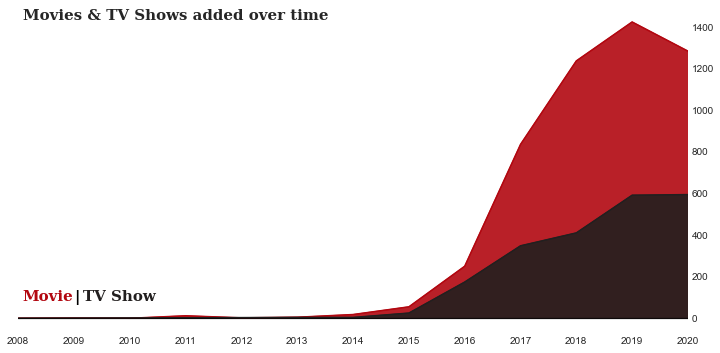

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)


for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

## Insight

- 2019 covid 이후로 컨텐츠 제작이 줄어든 것을 확인할 수 있다.

In [42]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)

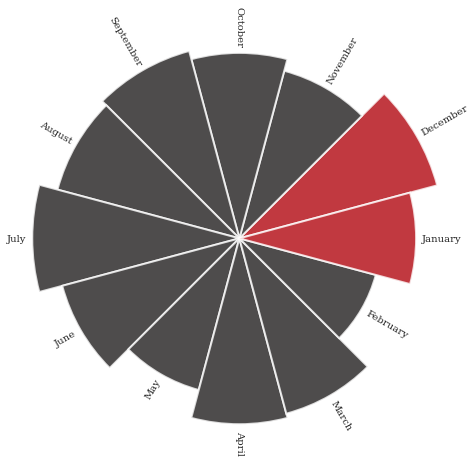

In [43]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T
data_sub2 = data_sub

data_sub2['Value'] = data_sub2['Movie'] + data_sub2['TV Show']
data_sub2 = data_sub2.reset_index()

df_polar = data_sub2.sort_values(by='month_name_added',ascending=False)


color_map = ['#221f1f' for _ in range(12)]
color_map[0] = color_map[11] =  '#b20710' # color highlight


# initialize the figure
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = df_polar['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_polar.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_polar.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_polar.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_polar["month_name_added"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")

## Insight
- 겨울인 12월과 1월에 사람들이 시청을 많이 하므로 컨텐츠가 가장 많이 추가되는 것을 확인할 수 있다.

In [44]:
from collections import Counter

def find_genre(df, country, c):
    gc = Counter()
    for genre in df[df['first_country']==country]['genre']:
        gc += Counter(genre)
    
    return gc.most_common(c)

def visualize(df):
    color_map = ['#b20710', '#221f1f']
    fig, ax = plt.subplots(1,1, figsize=(12, 6))
    sns.barplot(data=pd.DataFrame(df, columns=['Genre','Count']),palette=color_map, x='Genre',y='Count')

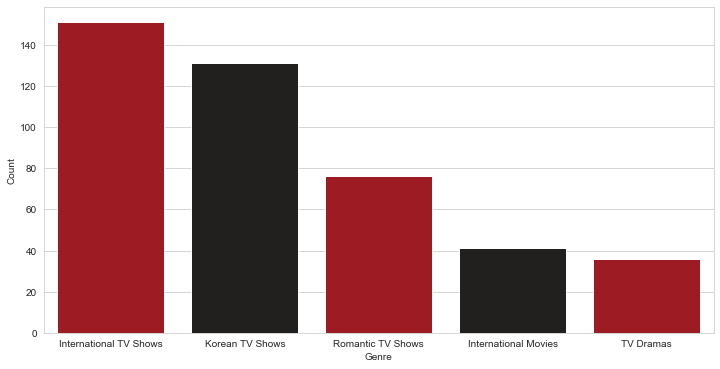

In [45]:
temp=find_genre(df, 'S. Korea', 5)
visualize(temp)

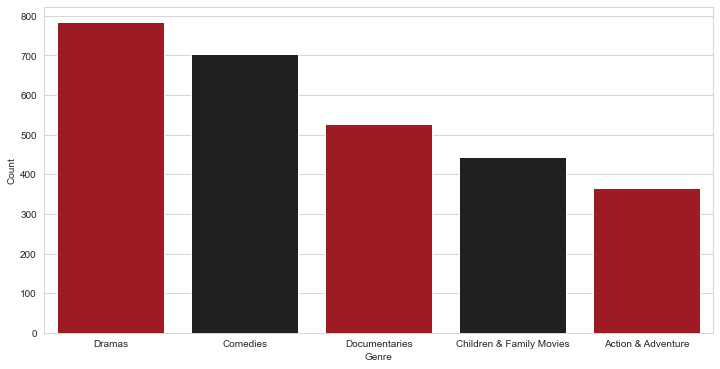

In [46]:
temp=find_genre(df, 'USA', 5)
visualize(temp)

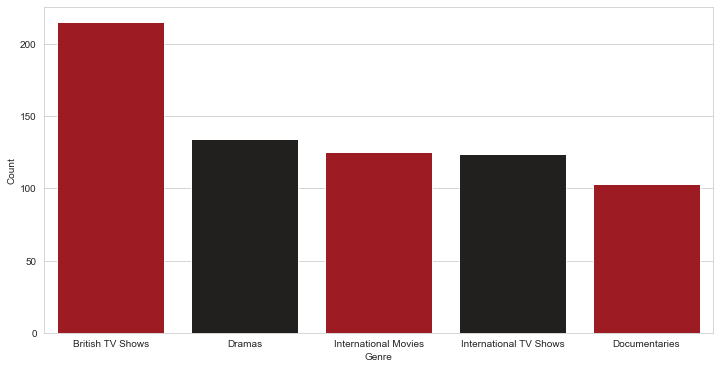

In [47]:
temp=find_genre(df, 'UK', 5)
visualize(temp)

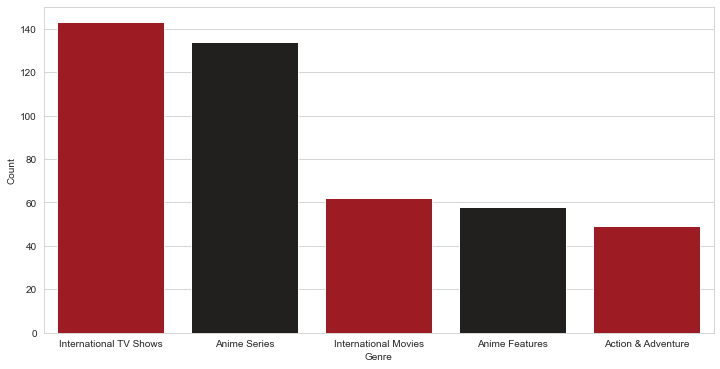

In [48]:
temp=find_genre(df, 'Japan', 5)
visualize(temp)

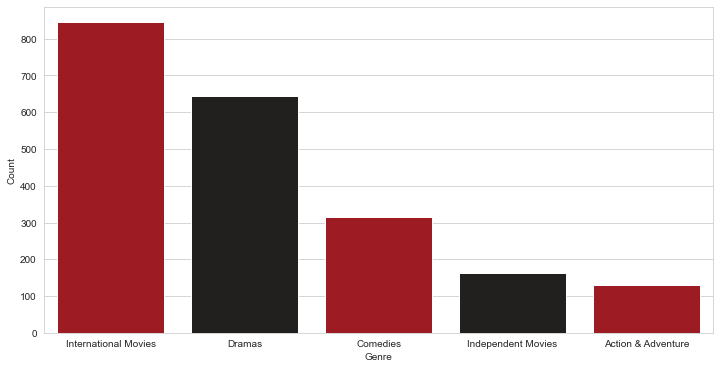

In [49]:
temp=find_genre(df, 'India', 5)
visualize(temp)